In [1]:
try:
    import ydata_profiling
except ImportError:
    !pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3da5f67501cd2a720cfb24f14aa771a61aaecc2b6ff1ad0879ca33a262f06d8b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
# примонтируем Google-диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/Othercomputers/MyProject/Kaggle/Regression/Skillbox_ML_Junior_Regression_8/Data

sample_submission.csv  test.csv  train.csv


## Описание задачи

Прочность бетона на сжатие определяет его качество и зависит от состава и особенностей технологического процесса. Обычно прочность выявляют с помощью стандартного испытания, в ходе которого специальный пресс раздавливает бетонный цилиндр определённого размера. Такие испытания требуют много времени и средств, а результаты бывают ошибочными, поэтому приходится проводить проверку заново.

Альтернативный путь — выявить зависимость прочности бетона от его состава и технологии производства, используя результаты проведённых испытаний. Вам предстоит построить модель машинного обучения, которая реализует этот подход. Задача предсказания характеристик готового продукта в зависимости от технологических особенностей производства часто возникает в промышленности. Успешное решение подобных задач может существенно сократить издержки и ускорить производство качественного продукта.

**Среднеквадратичная ошибка**  

Ваши решения будут оцениваться по значению корня из среднеквадратичной ошибки. Напомним, формула у нее такая:  

$$ rmse = \frac{1}{n}\ast \sqrt{\sum_{n}^{i=n}\left ( y_i-\hat{y_i} \right )^{2}}$$

Чем меньше значение rmse, тем лучше модель предсказывает данные. Мы знаем точные значения целевой переменной, поэтому можем вычислить rmse для ваших предсказаний. Те из вас, чьи модели показывают меньшие значения rmse, занимают более высокие места в турнирной таблице.

## Признаки

Тренировочная выборка состоит из десяти колонок. Первая — идентификатор состава (точки данных), следующие восемь — независимые переменные, а девятая (последняя) — целевая, которую должна предсказывать модель. Если в описании колонок встречаются незнакомые слова, не переживайте, так как это исходные материалы, которые используют в производстве бетона. От их количества и от особенностей технического процесса (например, от времени высыхания состава) зависит прочность конечного продукта — бетона.  



*   **Id** - идентификатор состава.
*   **CementComponent** - количество цемента в смеси.
*   **BlastFurnaceSlag** - количество доменного шлака в смеси.
*   **FlyAshComponent** - количество зольной пыли в смеси.
*   **WaterComponent** - количество воды в смеси.
*   **SuperplasticizerComponent** - количество суперпластификатора в смеси.
*   **CoarseAggregateComponent** - количество заполнителя с грубой фракцией в смеси.
*   **FineAggregateComponent** - количество заполнителя с мелкой фракцией в смеси.
*   **AgeInDays** - время высыхания в днях.
*   **Strength** - прочность получившегося бетона (Целевая переменная)





# Импорт библиотек, основные настройки и определение констант

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Any
from ydata_profiling import ProfileReport

In [5]:
!ls drive/Othercomputers/MyProject/Kaggle/Regression/Skillbox_ML_Junior_Regression_8/

 Data				 ML_junior_kaggle_regression_8.ipynb   __pycache__
 Ml_junior_final_project.ipynb	 my_functions.py		      'Regression analys.xmind'


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# расширяем поле ноутбука для удобства
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:87% !important;}</style>'))

In [8]:
# Настройки для pandas (количество отображаемых колонок)
pd.set_option('display.max_columns', 100)

In [9]:
# Определение стиля для pyplot
plt.style.use('ggplot')

In [10]:
# путь до папки с данными
PATH_MAIN = 'drive/Othercomputers/MyProject/Kaggle/Regression/Skillbox_ML_Junior_Regression_8/Data'

# PATH_MAIN = 'data'

# Загрузка данных. Общая информаци о датасете

In [11]:
file_train = os.path.join(PATH_MAIN, 'train.csv')
file_test = os.path.join(PATH_MAIN, 'test.csv')

In [12]:
df_train = pd.read_csv(file_train)
df_train.head()

,Id,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,230,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,3,16.28
1,231,491.0,26.0,123.0,210.0,3.9,882.0,699.0,56,59.59
2,232,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3,13.82
3,233,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
4,234,252.1,97.1,75.6,193.8,8.3,835.5,821.4,28,33.40


In [13]:
df_train.shape

(800, 10)

In [14]:
df_test = pd.read_csv(file_test)
df_test.shape

(230, 9)

In [15]:
profile = ProfileReport(
        df_train, title="Profile Report Strength of Cement ",
        explorative=True)

In [16]:
profile

Output hidden; open in https://colab.research.google.com to view.

**Выводы:**

1.   Удалить неинформативный признак Id
2.   Рассмотреть вариант укрупнения значений в признаках Fly Ash, Superplasticizer, Blast Furnace Slag
3.   Максимизировать нормальность признаков
4.   Создать новые признаки на основании существующих
5.   Исключить признаки на основании корреляционного анализа



# Предварительная обработка данных

## Удаление не информативных столбцов

In [17]:
def drop_noninform_feature(data: pd.DataFrame,
                           col_for_drop: List) -> pd.DataFrame:
    """
    Удаление неинформативных признаков,
    т.е. тех, в которых количество уникальных значений близко к общему
    количеству значений в признаке.

    Параметры:
        data: основной датасет
        col_for_drop: список колонок для удаления

    Возвращает:
        data: pd.DataFrame
    """
    data = data.drop(columns=col_for_drop)

    return data

In [18]:
# Удаление не информативных признаков в тренировочном
# и тестовом датасете

col_for_drop = ['Id']

df_train = drop_noninform_feature(df_train, col_for_drop)
df_test = drop_noninform_feature(df_test, col_for_drop)

In [19]:
df_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,3,16.28
1,491.0,26.0,123.0,210.0,3.9,882.0,699.0,56,59.59
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3,13.82
3,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
4,252.1,97.1,75.6,193.8,8.3,835.5,821.4,28,33.40


## Корреляционный анализ

In [34]:
df_corr = df_train.corr(method='pearson')
df_corr = df_corr.style.background_gradient(cmap='coolwarm')
df_corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.297844,-0.396055,-0.076779,0.096657,-0.087230,-0.237981,0.078314,0.497831
Blast Furnace Slag,-0.297844,1.000000,-0.305704,0.110507,0.045271,-0.292088,-0.266420,-0.038589,0.123579
Fly Ash,-0.396055,-0.305704,1.000000,-0.271224,0.374064,-0.025343,0.094669,-0.154681,-0.103265
Water,-0.076779,0.110507,-0.271224,1.000000,-0.654803,-0.174351,-0.457590,0.293501,-0.281885
Superplasticizer,0.096657,0.045271,0.374064,-0.654803,1.000000,-0.293708,0.250587,-0.207110,0.361332
Coarse Aggregate,-0.087230,-0.292088,-0.025343,-0.174351,-0.293708,1.000000,-0.182376,-0.012310,-0.168176
Fine Aggregate,-0.237981,-0.266420,0.094669,-0.457590,0.250587,-0.182376,1.000000,-0.170708,-0.171005
Age,0.078314,-0.038589,-0.154681,0.293501,-0.207110,-0.012310,-0.170708,1.000000,0.330996
Strength,0.497831,0.123579,-0.103265,-0.281885,0.361332,-0.168176,-0.171005,0.330996,1.000000


## Обработка выбросов

### Графики boxplot

In [ ]:
# Построение графиков
def grid_boxplot(data: pd.DataFrame,
                 max_col: int) -> None:
    """
    Строит графики (ящик с усами) и распологает их по три в ряд,

    Параметры:
        data: основной датасет
        max_col: максимальное количество графиков в одном ряду

    Возвращает:
        None

    """
    # Создаем список колонок
    list_col = data.columns

    # Определяем количество строк и столбцов в сетке
    n_rows = len(list_col) // max_col + 1
    n_cols = len(list_col) % max_col

    if n_cols == 0:
        n_rows -= 1

    # Задаем фигуру для построения графиков
    fig, axes = plt.subplots(nrows=n_rows, ncols=max_col,
                             figsize=(14, n_rows * 4))

    # Проходим по кажому ряду и стлбцу
    for row in range(n_rows):
        for col in range(max_col):

            # Определяем индекс признака
            index = row * max_col + col

            # Если признак с таким индексом существует, то отображаем
            # график для соответсвующего признака
            if index < len(list_col):
                axes[row, col].boxplot(df_train[list_col[index]])
                axes[row, col].set_title(f'{list_col[index]}')
                axes[row, col].set_ylabel(list_col[index])
            else:
                fig.delaxes(axes[row, col])

        plt.subplots_adjust(hspace=0.3)

    plt.show()

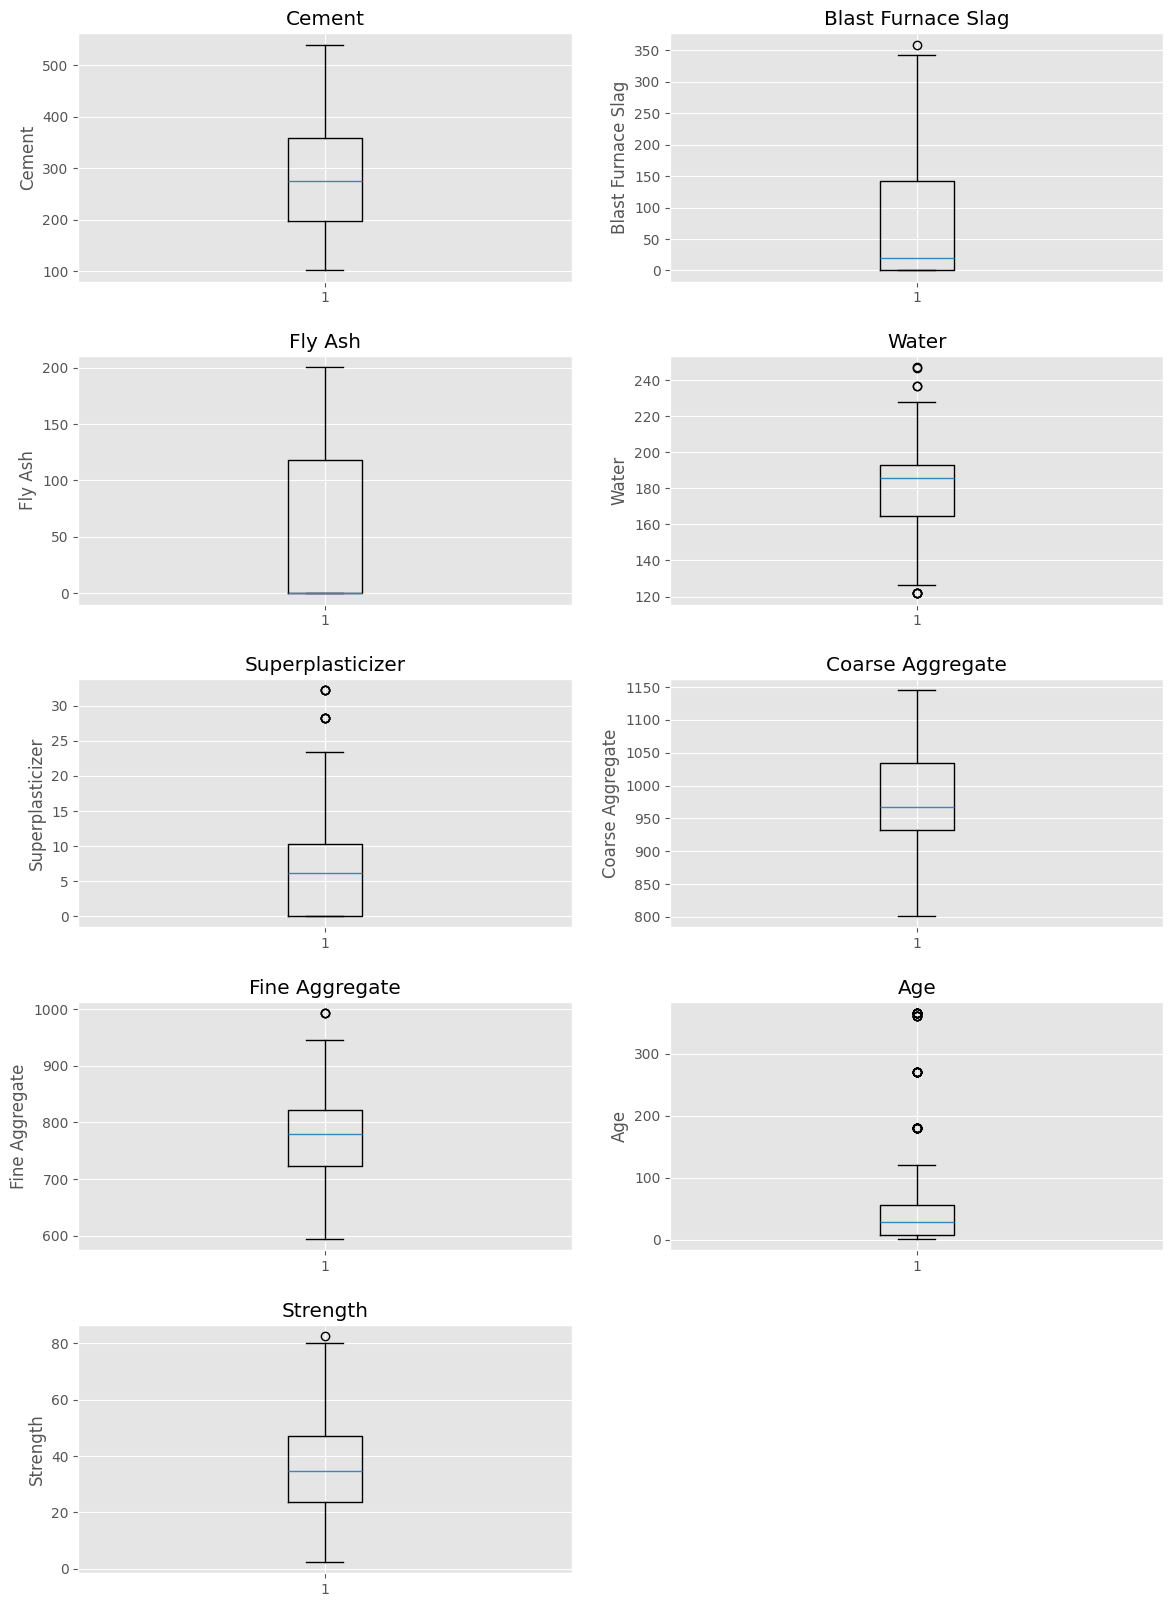

In [ ]:
grid_boxplot(df_train, max_col=2)

### Оецнка количества выбросов в признаках

In [ ]:
# описательные статистики
df_train.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,285.412500,72.279375,52.672500,181.895625,6.124500,973.810375,772.093125,46.608750,36.218325
std,106.020958,86.547254,63.627917,21.755194,6.008909,78.729449,80.779009,63.957105,16.797454
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,198.600000,0.000000,0.000000,164.900000,0.000000,932.000000,723.850000,7.000000,23.830000
50%,276.050000,20.000000,0.000000,185.700000,6.100000,968.000000,779.850000,28.000000,34.755000
75%,359.000000,142.500000,118.200000,193.000000,10.300000,1034.250000,822.650000,56.000000,47.152500
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# функция для расчета границ для нормальных значений
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

# Колонки для датафрейма с тнформацией о выбросах
COLUMN_NAMES = ['features', 'num_bottom_outlier', 'num_top_outlier',
                'lower_bound', 'upper_bound']

# Создаем пустой датафрейм с тнформацией о выбросах
df_outlier = pd.DataFrame(columns=COLUMN_NAMES)

list_col = df_train.columns

for col in list_col:
    # Определение границ выбросов
    boundaries = calculate_outliers(df_train[col])

    filt_bottom = df_train[col] < boundaries[0]
    filt_top = df_train[col] > boundaries[1]

    features = col

    # Определение количества выбросов в признаке
    num_bottom_outlier = len(df_train[filt_bottom])
    num_top_outlier = len(df_train[filt_top])

    new_data = {'features': features,
                'num_bottom_outlier': num_bottom_outlier,
                'num_top_outlier': num_top_outlier,
                'lower_bound': boundaries[0],
                'upper_bound': boundaries[1]
    }

    new_data = pd.DataFrame([new_data])

    # Добавление в датафрейм информации о выбросах
    df_outlier = pd.concat([df_outlier, new_data], ignore_index=True)

df_outlier

,features,num_bottom_outlier,num_top_outlier,lower_bound,upper_bound
0,Cement,0,0,-42.00000,599.60000
1,Blast Furnace Slag,0,1,-213.75000,356.25000
2,Fly Ash,0,0,-177.30000,295.50000
3,Water,5,4,122.75000,235.15000
4,Superplasticizer,0,9,-15.45000,25.75000
5,Coarse Aggregate,0,0,778.62500,1187.62500
6,Fine Aggregate,0,3,575.65000,970.85000
7,Age,0,46,-66.50000,129.50000
8,Strength,0,1,-11.15375,82.13625


In [ ]:
filt_1 = (
    (df_outlier['num_bottom_outlier'] > 0) |
    (df_outlier['num_top_outlier'] > 0)
)

col_outlier = df_outlier[filt_1]['features'].values

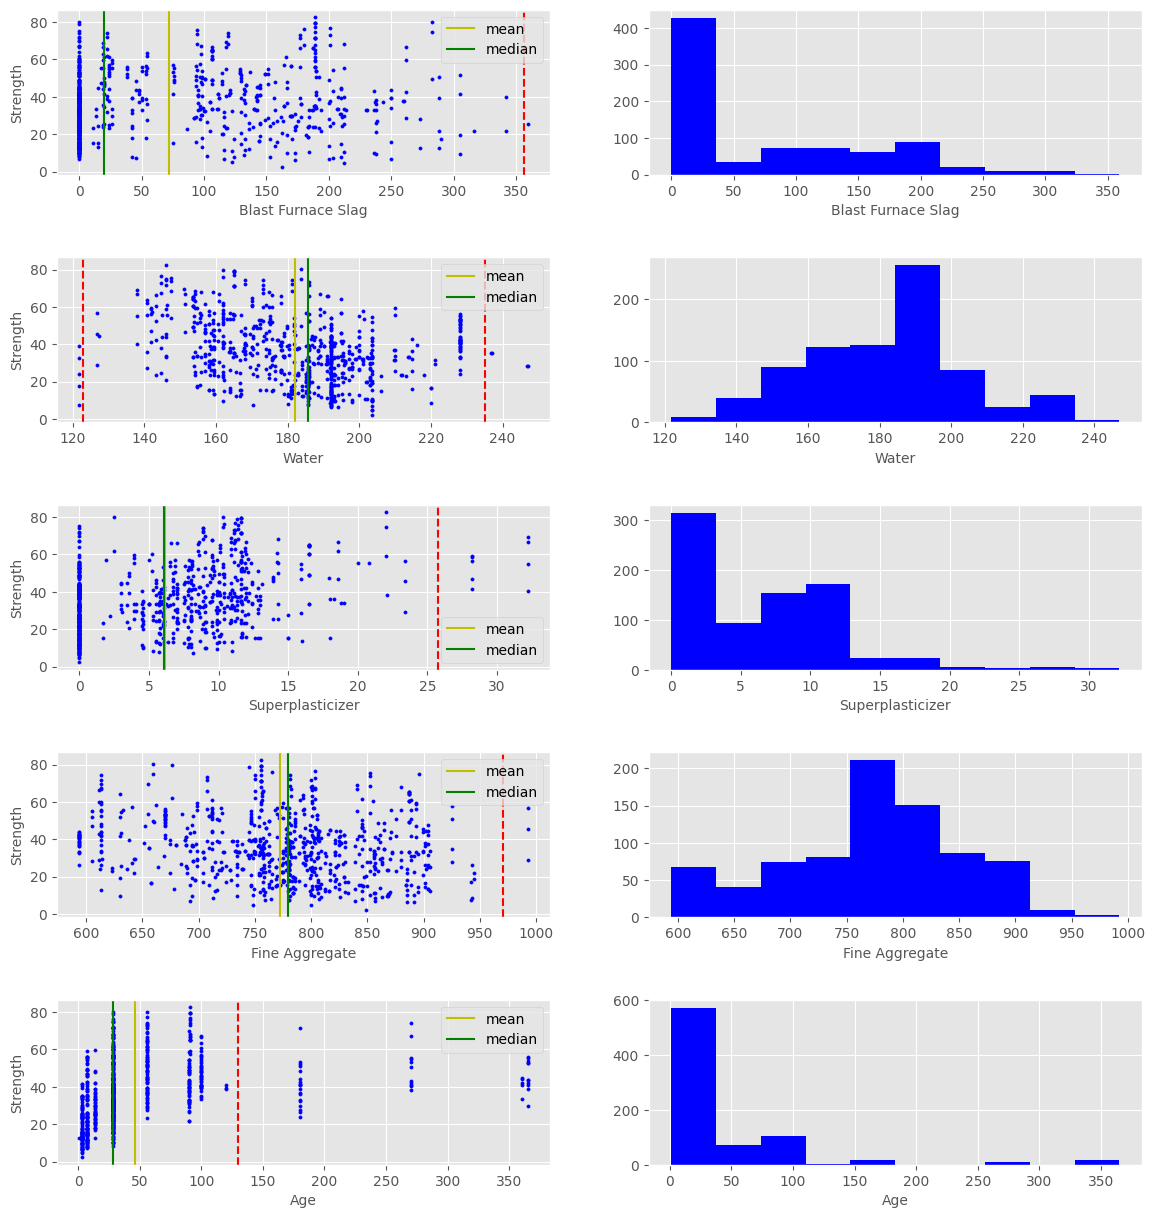

In [ ]:
# Создаем фигуру и координатные оси для подграфиков
fig, axs = plt.subplots(nrows=len(col_outlier) - 1, ncols=2,
                        figsize=(14, 15))

# Проходим по каждому столбцу из списка выбросов, кроме последнего
for col in range(len(col_outlier) - 1):
    # Получаем имя текущего столбца
    column = col_outlier[col]

    # Фильтруем данные для текущего столбца
    filt_2 = (df_outlier['features'] == column)

    # Создаем диаграмму разброса для текущего столбца и прочности
    axs[col, 0].scatter(df_train[column], df_train['Strength'],
                        s=5, color='b')

    axs[col, 0].axvline(df_train[column].mean(), color='y',
                        linestyle='-', label='mean')
    axs[col, 0].axvline(df_train[column].median(), color='g',
                        linestyle='-', label='median')

    axs[col, 0].legend()

    # Получаем данные о выбросах
    num_bottom_outlier = \
        df_outlier.loc[filt_2, 'num_bottom_outlier'].values[0]
    lower_bound = df_outlier.loc[filt_2, 'lower_bound'].values[0]
    num_top_outlier = \
        df_outlier.loc[filt_2, 'num_top_outlier'].values[0]
    upper_bound = df_outlier.loc[filt_2, 'upper_bound'].values[0]

    # Добавляем вертикальные линии для нижней границы,
    # если есть выбросы
    if num_bottom_outlier > 0:
        axs[col, 0].axvline(lower_bound, color='r', linestyle='--')

    # Добавляем вертикальные линии для верхней границы,
    # если есть выбросы
    if num_top_outlier > 0:
        axs[col, 0].axvline(upper_bound, color='r', linestyle='--')

    # Устанавливаем подписи для осей диаграммы разброса
    axs[col, 0].set_xlabel(column, fontsize=10)
    axs[col, 0].set_ylabel('Strength', fontsize=10)

    # Создаем гистограмму для текущего столбца
    axs[col, 1].hist(df_train[column], color='b')
    axs[col, 1].set_xlabel(column, fontsize=10)

# Настраиваем отступы между подграфиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()


**Выводы:**

1.   Во всех признаках выбросы не являются ошибочными значениями, поэтому нельзя применять винзоризацию, а стоит максимизировать нормальность в данных признаках


